## Least Squares Solutions

In this section we address the problem of inconsistent systems, and the common resolution known as the least squares solution.

In the case that $AX=B$ is inconsistent, there is no vector $X$ such that the two vectors $AX$ and $B$ are the same.  A natural idea then is to choose a vector $X$ such that $AX$ and $B$ are as close as possible.  To do this we define the error vector $E=AX-B$, and choose the $X$ that minimizes $||E||$.  This choice of $X$ is known as the **least squares solution** to the system $AX=B$, and we will assign it the symbol $\hat{X}$.  The direct approach to this formulation of the problem requires the use of calculus to minimize $||E||$, but we will take a different approach that only requires inner products and projections.  We will first give the solution to the least squares problem and provide only a visual explanation.  After some examples, we will give a more rigorous explanation.  

Recall that if the system $AX=B$ is inconsistent, the vector $B$ is not in $\mathcal{C}(A)$, the column space of $A$.  **The error vector $E=AX-B$ has minimum magnitude exactly when it is orthogonal to $\mathcal{C}(A)$**.  We can easily visualize this in the case that $\mathcal{C}(A)$ as a one dimensional subspace of $\mathbb{R}^2$.

### Example 1:  Two inconsistent equations

Let's consider a simple example of an inconsistent system $AX=B$, where $A$ is a $2\times 2$ matrix.

$$
\begin{equation}
\left[\begin{array}{rr} 3 & 9 \\ 1 & 3 \end{array}\right]X = \left[\begin{array}{r} 2 \\ 4 \end{array}\right]    
\end{equation}
$$

In this example, the second column of $A$ is a multiple of the first, so $\mathcal{C}(A)$ is a one-dimensional space that contains only multiples of these vectors.  Since $B$ is not a multiple of either column, $B$ is not in $\mathcal{C}(A)$.

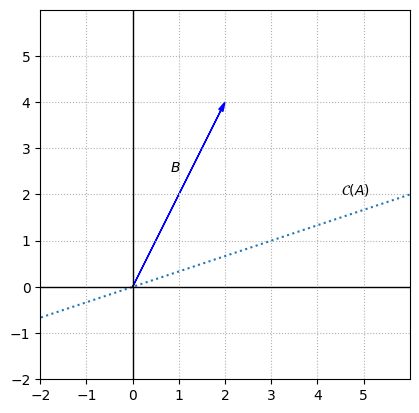

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-6,6,100)

fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')


ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

Let's look at the relationship between $AX$, $B$, and $E$ for an arbitrary vector $X$ in $\mathbb{R}^2$.

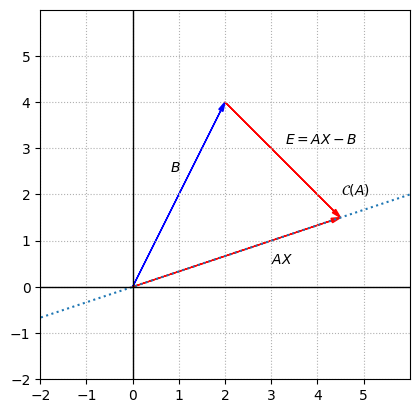

In [130]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,4.5,1.5,fc='r',ec='r',**options)
ax.arrow(2,4,2.5,-2.5,fc='r',ec='r',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')
ax.text(3,0.5,'$AX$')
ax.text(3.3,3.1,'$E=AX-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

We can see that $||E||$ is a measure of the distance between $B$ and a vector in $\mathcal{C}(A)$, and that $||E||$ will be minimized if we choose $X$ so that $E$ is orthogonal to $\mathcal{C}(A)$.  This is the least squares solution we refer to as $\hat{X}$.  The closest vector in $\mathcal{C}(A)$ to $B$ is the *orthogonal projection* of $B$ onto $\mathcal{C}(A)$.  We will use the notation $\hat{B}$ for this projection so that we now have $A\hat{X}=\hat{B}$. 

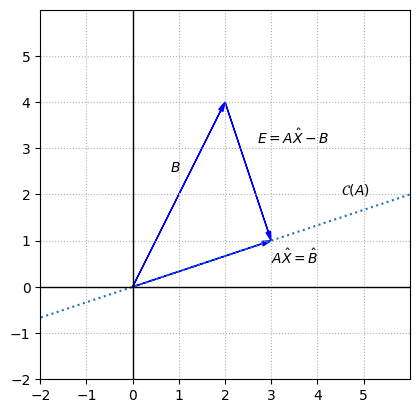

In [131]:
fig, ax = plt.subplots()

options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,4,fc='b',ec='b',**options)
ax.arrow(0,0,3,1,fc='b',ec='b',**options)
ax.arrow(2,4,1,-3,fc='b',ec='b',**options)
ax.plot(x,x/3,ls=':')

ax.set_xlim(-2,6)
ax.set_ylim(-2,6)
ax.set_aspect('equal')
ax.set_xticks(np.arange(-2,6,step = 1))
ax.set_yticks(np.arange(-2,6,step = 1))

ax.text(0.8,2.5,'$B$')
ax.text(4.5,2,'$\mathcal{C}(A)$')
ax.text(3,0.5,'$A\hat{X}=\hat{B}$')
ax.text(2.7,3.1,'$E=A\hat{X}-B$')

ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.grid(True,ls=':')

In this example, we can use the [projection formula](Inner_Products.ipynb) from the beginning of the chapter to calculate $E$ and $\hat{B}$

$$
\begin{equation}
E = \left[ \begin{array}{r} 1 \\ -3 \end{array} \right] \hspace{2cm} 
\hat{B} = \left[ \begin{array}{r} 3 \\ 1 \end{array} \right]
\end{equation}
$$

To find $\hat{X}$, we solve the system $A\hat{X}=\hat{B}$

$$
\begin{equation}
\left[\begin{array}{rr} 3 & 9 \\ 1 & 3 \end{array}\right]\hat{X} = \left[\begin{array}{r} 3 \\1 \end{array}\right]    
\end{equation}
$$

In this system, the second equation is just a multiple of the first.  This means that $x_1+3x_2 = 1$ is the only constraint on the unknowns, and that we can take $x_2$ to be a free variable.  If we assign $x_2$ a parameter, we can describe all possible solutions as follows.

$$
\begin{eqnarray*}
x_1 & = & 1-3s \\
x_2 & = & s
\end{eqnarray*}
$$

In this particular example, which is meant to show a clear picture of $E$, there is not a unique least squares solution since many vectors solve the matrix equation $A\hat{X}=\hat{B}$.  Inconsistent systems that arise in applications typically do have a unique least squares solution.   

### Normal equations

If we assume for now that the error $E=AX-B$ will have minimum magnitude when it is orthogonal to the column space of $A$, we can use our knowledge of the fundamental subspaces to solve the least squares problem when the column space is of higher dimension.  Recall from a previous section that any vector orthogonal to $\mathcal{C}(A)$ must lie in $\mathcal{N}(A^T)$, the null space of $A^T$.  This means that $A^TE=0$ for the least squares solution.  Filling in $E=AX-B$ gives us the system $A^T(AX-B)=0$, which can be written as $A^TAX=A^TB$.  This system of equations is referred to as the **normal equations**.

### Example 2:  Four inconsistent equations

Although the method of least squares can be applied to any inconsistent system, it is usually associated with systems that have more equations than unknowns.  These systems are called overdetermined, and here is one such example.

$$
\begin{eqnarray*}
2x_1 + x_2 & = & 0 \\
2x_1 - x_2 & = & 2 \\
3x_1 + 2x_2 & = & 1 \\
5x_1 + 2x_2 & = & -2
\end{eqnarray*}
$$

Let $A$ be the $4\times 2$ coefficient matrix, and let $B$ be the vector of the right-hand sides of the equations.  To verify that the system is indeed inconsistent, we can compute the RREF of the augmented matrix $\left[A|B\right]$.

In [132]:
import numpy as np

def rref(matrix):
    """Reduce the given matrix to Reduced Row Echelon Form (RREF)."""
    A = matrix.astype(float)  # Ensure the matrix is of type float for operations
    rows, cols = A.shape
    lead = 0  # Current pivot column
    
    for r in range(rows):
        if lead >= cols:
            break
        i = r
        while A[i, lead] == 0:
            i += 1
            if i == rows:
                i = r
                lead += 1
                if lead == cols:
                    return A
        # Swap the current row with the pivot row
        A[[i, r]] = A[[r, i]]
        
        # Normalize the pivot row
        A[r] = A[r] / A[r, lead]
        
        # Eliminate all other rows in the pivot column
        for i in range(rows):
            if i != r:
                A[i] -= A[r] * A[i, lead]
        lead += 1
    return A

# Example matrix
A_augmented = np.array([[2, 1, 0], [2, -1, 2], [3, 2, 1], [5, 2, -2]])
A_reduced = rref(A_augmented)
print("Reduced Row Echelon Form:")
print(A_reduced)


Reduced Row Echelon Form:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


The pivot in the last column indicates that the system is inconsistent.  The two columns of $A$ are linearly independent and form a basis for $\mathcal{C}(A)$, which is a two-dimensional subspace of $\mathbb{R}^4$, but $B$ does not lie in this subspace.  

To find the least squares solution, we will construct and solve the normal equations, $A^TAX = A^TB$.

In [133]:


A = np.array([[2, 1],[2, -1],[3, 2],[5,2]])
B = np.array([[0],[2],[1],[-2]])

# Construct A^TA
N_A = A.transpose()@A
# Construct A^TA
N_B = A.transpose()@B
print(N_A,'\n')
print(N_B)


[[42 16]
 [16 10]] 

[[-3]
 [-4]]


The normal equations are a $2\times 2$ system, which can be solved using elimination.


$$
\begin{eqnarray*}
42x_1 + 16x_2 & = & -3 \\
16x_2 + 10x_2 & = & -4 
\end{eqnarray*}
$$


In [134]:
from scipy.linalg import solve

# Solve the system using SciPy's linear solver
X_hat = solve(N_A,N_B)
print("Solution using SciPy:", X_hat)

# Calculate the error and its magnitude
E = A @ X_hat - B
error_magnitude = np.linalg.norm(E)
print("Error magnitude:", error_magnitude)


Solution using SciPy: [[ 0.20731707]
 [-0.73170732]]
Error magnitude: 2.5874933722078426


In this example, there is a unique vector $\hat{X}$ that minimizes $||E||$.  Remember from the previous example that $\hat{X}$ is the vector such that $A\hat{X}=\hat{B}$, where $\hat{B}$ is the orthogonal projection of $B$ onto $\mathcal{C}(A)$.  Note however that when we find the solution using the normal equations, we do not actually need to compute $\hat{B}$.

We have not provided proof yet that $\hat{X}$ minimizes $||E||$, but we could provide some numerical evidence by computing $||E||$ for other vectors that are "near" $\hat{X}$.  For example, we might compute $||E||$ for a vector $X$ that has components that are within one of $\hat{X}$.  We will use the $\texttt{random}$ module to generate a typical vector.

In [135]:
P = np.random.rand(2,1)
X = X_hat + P
print(X)
E = A@X - B
print("Magnitude of error is:",np.linalg.norm(E))

[[ 0.72129112]
 [-0.01240283]]
Magnitude of error is: 5.89870712951943


Running the code in this cell does not prove that $||E||$ is at minimum for $X=\hat{X}$, even if we were to put it in a loop and execute it a million times.  It does allows us to demonstrate some evidence to augment our reasoning.  Another thing we might do to gather evidence is let $X= \delta P$, and plot $||E||$ as a function of $\delta$. 

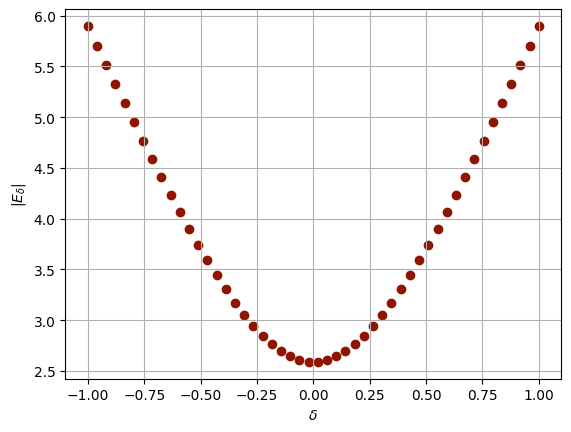

In [136]:
## Set the number of vectors to be tested.
N = 50

delta = np.linspace(-1,1,N)
E_delta = np.linspace(-1,1,N)

## P is the random vector defined in the previous cell.  
## The output of this cell will change with each execution of the previous cell.

for i in range(N):
    X = X_hat + delta[i]*P
    E_delta[i] = np.linalg.norm(A@X-B)
    

fig, ax = plt.subplots()
ax.scatter(delta,E_delta,color='xkcd:brick red');
ax.set_xlabel('$\delta$')
ax.set_ylabel('$|E_{\delta}|$');
ax.grid(True)

### Best approximation

Although numerical evidence and the plot of $B$, $\hat{B}$, and $E$ may convince us that $||E||$ is minimum when $E$ and $\hat{B}$ are orthogonal, we have not yet given proof of the fact.  To accomplish this, we need to show that $||B-Y|| \ge ||B-\hat{B}||$ where $Y$ is an arbitrary vector in $\mathcal{C}(A)$.  This can be explained using properties of the dot product.  

$$
\begin{eqnarray*}
||B-Y||^2 & = & ||(B-\hat{B}) + (\hat{B}-Y)||^2 \\
 & = & \left((B-\hat{B}) + (\hat{B}-Y)\right) \cdot \left((B-\hat{B}) + (\hat{B}-Y)\right) \\
 & = & (B-\hat{B})\cdot (B-\hat{B}) + 2(\hat{B}-Y) \cdot (B-\hat{B}) + (\hat{B}-Y)\cdot(\hat{B}-Y) \\
 & = & ||B-\hat{B}||^2 + ||\hat{B}-Y||^2 \\
 & \ge & ||B-\hat{B}||^2
\end{eqnarray*}
$$

The first key fact is that $(\hat{B}-Y)$ is in $\mathcal{C}(A)$ so $(\hat{B}-Y) \cdot (B-\hat{B}) = 0$.  We also need to observe that magnitudes of vectors can never be negative since they are sums of squares.  Indeed, the only vector with magnitude zero is the vector with all zero entries.  In particular, this means that $||\hat{B}-Y||^2 \ge 0$. 

###  QR factorization to solve normal equations

In this final example, we consider making use of the $QR$ factorization to solve the normal equations.  If we insert $A=QR$ into the normal equations $A^TAX=A^TB$, we will see a simplification.

$$
\begin{eqnarray*}
(QR)^T(QR)X & = & (QR)^TB \\
R^TQ^TQRX & = & R^TQ^TB  \\
R^TRX & = &  R^TQ^TB \\
RX & = & Q^TB
\end{eqnarray*}
$$

The systm $RX=Q^TB$ is triangular and can be solved with back substitution.  Note that this approach replaces elimination ($LU$ factorization) with $QR$ factorization.

In [137]:
Q, R = np.linalg.qr(A)
QTB = Q.T @ B
X_hat = np.linalg.solve(R, QTB)
print("Solution X_hat:", X_hat)

Solution X_hat: [[ 0.20731707]
 [-0.73170732]]


### Exercises

**Exercise 1:** Verify that the following system is inconsistent, then find the least squares solution.

$$
\begin{eqnarray*}
    2x_2 + 2x_3 & = & 3 \\
3x_1 - x_2 - 2x_3 & = & 2 \\
x_1 - 2x_2 - x_3 & = & 1 \\
4x_1 + 2x_2 + 4x_3 & = & 0
\end{eqnarray*}
$$

In [138]:
## Code solution here.
AA1 = np.array([[0,2, 2,3],[3,-1, -2,2],[1,-2, -1,1],[4,2,4,0]])
AA2 = rref(AA1)
print(AA2)
print("So, we can see the last line, it is inconsistent, and here is the solution")
AA3 = np.array([[0,2, 2],[3,-1, -2],[1,-2, -1],[4,2,4]])
BB1 = np.array([[3],[2],[1],[0]])
N_A1 = AA3.transpose()@AA3
N_B1 = AA3.transpose()@BB1
XX1 = solve(N_A1,N_B1)
print(XX1)


[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [-0. -0. -0.  1.]]
So, we can see the last line, it is inconsistent, and here is the solution
[[ 0.4       ]
 [ 0.89275362]
 [-0.67536232]]


**Exercise 2:** Another way find the least squares solution to an inconsistent system is to find $\hat{B}$ by projecting $B$ onto $\mathcal{C}(A)$ and then solving $A\hat{X}=\hat{B}$ directly.  (*Review for how to compute this projection.*)  Demonstrate the entire calculation using $A$ and $B$ from **Example 2**.

In [139]:
## Code solution here.
A = np.array([[2, 1],[2, -1],[3, 2],[5,2]])
B = np.array([[0],[2],[1],[-2]])
N_B = A.transpose()@B
N_A = A.transpose()@A
A_inverse=np.linalg.inv(N_A)
N_B = A_inverse@N_B
N_B = A@N_B
print (N_B)
X_hat=solve(A.transpose()@A,A.transpose()@N_B)
print("solution:")
print(X_hat)

[[-0.31707317]
 [ 1.14634146]
 [-0.84146341]
 [-0.42682927]]
solution:
[[ 0.20731707]
 [-0.73170732]]


**Exercise 3:** Explain why an inconsistent system, $AX=B$, does not have a unique least squares solution if the columns of $A$ are linearly dependent.

In [140]:
## Solution here.(word explanation is enough, no need to write code)
print("The lack of a unique least squares solution fo AX=B when the columns of A are linearly dependent arises because ATA is singular, leading to multiple solutions to the normal equations.")

The lack of a unique least squares solution fo AX=B when the columns of A are linearly dependent arises because ATA is singular, leading to multiple solutions to the normal equations.


**Exercise 4:** Demonstrate that the following inconsistent system does not have a unique least squares solution.




$$
\begin{eqnarray*}
    x_2 - x_3 & = & 3 \\
3x_1 - x_2 + 4x_3 & = & 2 \\
x_1 - 2x_2 + 3x_3 & = & 1 \\
4x_1 + 2x_2 + 2x_3 & = & 0
\end{eqnarray*}
$$

In [141]:
## Code solution here.
AA3 = np.array([[0,1, -1],[3,-1, 4],[1,-2, 3],[4,2,2]])
BB1 = np.array([[3],[2],[1],[0]])
N_A1 = AA3.transpose()@AA3
N_B1 = AA3.transpose()@BB1
AA2 = rref(N_A1)
print(N_A1)
print("use rref function")
print(AA2)
print("this is singular matrix, so it will not have a unique solution")

[[26  3 23]
 [ 3 10 -7]
 [23 -7 30]]
use rref function
[[ 1.  0.  1.]
 [ 0.  1. -1.]
 [ 0.  0.  0.]]
this is singular matrix, so it will not have a unique solution


**Exercise 5:** If the system $AX = B$ is inconsistent, find the least squares solution to it and determine whether or not the least squares solution is unique.


$$
\begin{equation}
A = \left[\begin{array}{rr} 1 & 2 & 4 \\ 1 & 1 & 1 \\ 2 & 2 & 0 \\ 1 & 2 & 1 \end{array}\right]
\quad\quad
B = \left[\begin{array}{r} 1 \\1 \\ 1 \\ 1 \end{array}\right]  
\end{equation}
$$

In [142]:
## Code solution hereAA3 = np.array([[0,2, -3],[3,-1, 4],[1,-2, 3],[4,2,2]])
AA3 = np.array([[1,2,4],[1,1,1],[2,2,0],[1,2,1]])
BB1 = np.array([[1],[1],[1],[1]])
N_A1 = AA3.transpose()@AA3
AA2 = rref(AA1)
print(AA2,"so it is not inconsistent,the answer is")
N_B1 = AA3.transpose()@BB1
XX1 = solve(N_A1,N_B1)
print(XX1)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [-0. -0. -0.  1.]] so it is not inconsistent,the answer is
[[0.35849057]
 [0.22641509]
 [0.0754717 ]]


**Exercise 6:** Find the equation of the line that best fits through the three given points:  $(0,2), (2,3)$ and $(1,4)$ in the sense of least squares.

In [143]:
## Code solution here
AA3 = np.array([[0,1],[2,1],[1,1]])
BB1 = np.array([[2],[3],[4]])
N_A1 = AA3.transpose()@AA3
N_B1 = AA3.transpose()@BB1
XX1 = solve(N_A1,N_B1)
print(XX1,"So it is")
print("y=",XX1[0][0],"x+",XX1[1][0])

[[0.5]
 [2.5]] So it is
y= 0.5 x+ 2.5


**Exercise 7:** Find the equation of the parabola that best fits through the given points: $(-1,2), (1,0), (3,1)$ and $(4,2)$ in the sense of least squares.

In [144]:
## Code solution here
AA3 = np.array([[1,-1,1],[1,1,1],[9,3,1],[16,4,1]])
BB1 = np.array([[2],[0],[1],[2]])
N_A1 = AA3.transpose()@AA3
N_B1 = AA3.transpose()@BB1
XX1 = solve(N_A1,N_B1)
print(XX1,"So it is")
print("y=",XX1[0][0],"x^2+",XX1[1][0],"x+",XX1[2][0])


[[ 0.31532663]
 [-0.91834171]
 [ 0.72864322]] So it is
y= 0.31532663316582904 x^2+ -0.9183417085427132 x+ 0.7286432160804024
